In [1]:
#Importar bibliotecas

#Para manipulacoes de dados
import numpy as np 
import pandas as pd 
import pandas_profiling as pp 
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Para manipular datas
from datetime import datetime

#Para vizualização usando matplotlib
from matplotlib import pyplot as plt 
from IPython.core.pylabtools import figsize
%matplotlib inline



In [2]:
#Carregando os dados para treino
building = pd.read_csv("data/building_metadata.csv")
weather_train = pd.read_csv("data/weather_train.csv", index_col=1, parse_dates = True)
train = pd.read_csv("data/train.csv", index_col=2, parse_dates = True)

In [3]:
# Funcao para reduzir o uso de memoria do dataframe
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
reduce_memory_usage(building)
reduce_memory_usage(weather_train)
reduce_memory_usage(train)

Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to 289.19 Mb (53.1% reduction)


,building_id,meter,meter_reading
timestamp,,,
2016-01-01 00:00:00,0,0,0.000
2016-01-01 00:00:00,1,0,0.000
2016-01-01 00:00:00,2,0,0.000
2016-01-01 00:00:00,3,0,0.000
2016-01-01 00:00:00,4,0,0.000
2016-01-01 00:00:00,5,0,0.000
2016-01-01 00:00:00,6,0,0.000
2016-01-01 00:00:00,7,0,0.000
2016-01-01 00:00:00,8,0,0.000


In [5]:
#Informacoes sobre o dataframe train
print("INFORMACOES:")
train.info()
print("")

print("\nDESCRICAO:")
train.describe(include='all')


INFORMACOES:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20216100 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 3 columns):
building_id      int16
meter            int8
meter_reading    float32
dtypes: float32(1), int16(1), int8(1)
memory usage: 289.2 MB


DESCRICAO:


,building_id,meter,meter_reading
count,20216100.000,20216100.000,20216100.000
mean,799.278,0.662,1988.706
std,426.913,0.931,153215.938
min,0.000,0.000,0.000
25%,393.000,0.000,18.300
50%,895.000,0.000,78.775
75%,1179.000,1.000,267.984
max,1448.000,3.000,21904700.000


In [6]:
#Valores ausentes do dataframe train
print("\nVALORES AUSENTES:")
train.isna().sum()



VALORES AUSENTES:


building_id      0
meter            0
meter_reading    0
dtype: int64

In [7]:
#Informacoes do dataframe weather_train
print("INFORMACOES:")
weather_train.info()
print("")
print("DESCRICAO")
weather_train.describe(include='all')

INFORMACOES:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139773 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 8 columns):
site_id               139773 non-null int8
air_temperature       139718 non-null float16
cloud_coverage        70600 non-null float16
dew_temperature       139660 non-null float16
precip_depth_1_hr     89484 non-null float16
sea_level_pressure    129155 non-null float16
wind_direction        133505 non-null float16
wind_speed            139469 non-null float16
dtypes: float16(7), int8(1)
memory usage: 3.1 MB

DESCRICAO


,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000,139718.000,70600.000,139660.000,89484.000,129155.000,133505.000,139469.000
mean,7.479,nan,nan,nan,nan,nan,nan,nan
std,4.605,0.000,0.000,0.000,nan,nan,nan,0.000
min,0.000,-28.906,0.000,-35.000,-1.000,968.000,0.000,0.000
25%,3.000,7.199,0.000,0.600,0.000,1012.000,80.000,2.100
50%,7.000,15.000,2.000,8.297,0.000,1016.500,190.000,3.100
75%,11.000,22.203,4.000,14.398,0.000,1021.000,280.000,5.000
max,15.000,47.188,9.000,26.094,343.000,1046.000,360.000,19.000


In [8]:
#Valores ausentes do dataframe weather_train
print("\nVALORES AUSENTES:")
weather_train.isna().sum()


VALORES AUSENTES:


site_id                   0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [9]:
#Informacoes do dataframe building
print("INFORMACOES:")
building.info()
print("")
print("DESCRICAO")
building.describe(include='all')

INFORMACOES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int8
building_id    1449 non-null int16
primary_use    1449 non-null object
square_feet    1449 non-null int32
year_built     675 non-null float16
floor_count    355 non-null float16
dtypes: float16(2), int16(1), int32(1), int8(1), object(1)
memory usage: 27.0+ KB

DESCRICAO


,site_id,building_id,primary_use,square_feet,year_built,floor_count
count,1449.000,1449.000,1449,1449.000,675.000,355.000
unique,nan,nan,16,nan,nan,nan
top,nan,nan,Education,nan,nan,nan
freq,nan,nan,549,nan,nan,nan
mean,6.952,724.000,NaN,92111.776,inf,3.740
std,5.003,418.435,NaN,110769.951,31.062,3.334
min,0.000,0.000,NaN,283.000,1900.000,1.000
25%,3.000,362.000,NaN,23012.000,1949.000,1.000
50%,5.000,724.000,NaN,57673.000,1970.000,3.000
75%,13.000,1086.000,NaN,115676.000,1995.000,5.000


In [10]:
#Valores ausentes do dataframe building
print("\nVALORES AUSENTES:")
building.isna().sum()


VALORES AUSENTES:


site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

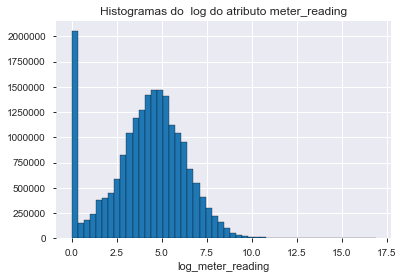

In [11]:
#Histograma do log de meter_reading

fig1 = plt.hist(np.log1p(train['meter_reading']), bins=50, edgecolor='black')
plt.xlabel('log_meter_reading')
plt.title('Histogramas do  log do atributo meter_reading')
plt.gcf().set_size_inches(6, 4)
plt.savefig('fig1.png', format='png', dpi=300)



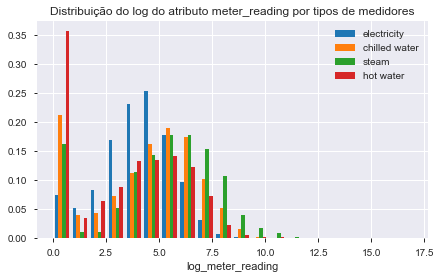

In [12]:
#Comparacao da distribuicao do log_meter_reading para diferentes metricas
x0 = train[train['meter'] == 0]
x1 = train[train['meter'] == 1]
x2 = train[train['meter'] == 2]
x3 = train[train['meter'] == 3]

y0 = np.log1p(x0['meter_reading'])
y1 = np.log1p(x1['meter_reading'])
y2 = np.log1p(x2['meter_reading'])
y3 = np.log1p(x3['meter_reading'])

meters = [0, 1, 2, 3]

fig2 = plt.hist([y0, y1, y2, y3], bins=20, label=meters, density=True)
plt.legend(['electricity', 'chilled water', 'steam', 'hot water'])
plt.xlabel('log_meter_reading')
plt.title('Distribuição do log do atributo meter_reading por tipos de medidores')
plt.gcf().set_size_inches(7, 4)
plt.savefig('fig2.png', format='png', dpi=300)



In [13]:
#Juntar as amostras do df train por dias, fazendo a media dos valores,
#organizando por meter
train_day = (train.
             groupby('meter').
             meter_reading.
             resample('d').mean().
             reset_index())

train_day_meter = (train_day.
                  pivot(index='timestamp',
                        columns='meter',
                        values='meter_reading').
                  reset_index())
train_day_meter.rename(columns = {0: "electricity_reading",
                                 1: "chilled_water_reading",
                                 2: "steam_reading",
                                 3: "hot_water_reading"},
                      inplace=True)

In [14]:
#Juntar as amostras do df weather_train por dias
weather_train_day = (weather_train.
                     resample('d').
                     mean())
weather_train_day.reset_index(inplace=True)
weather_train_day = weather_train_day.drop('site_id', axis=1)

In [15]:
#Unir os dfs train e weather_train
weather_meter_train = (train_day.
                        merge(weather_train_day,
                             on='timestamp',
                             how='left'))

weather_meter_train['meter'] = (weather_meter_train['meter'].
                                     map({0: 'electricity',
                                          1: 'chilled_water',
                                          2: 'steam',
                                          3: 'hot_water'}))

In [16]:
#Separando por medição
weather_meter_0 = weather_meter_train[weather_meter_train['meter'] == 'electricity']
weather_meter_1 = weather_meter_train[weather_meter_train['meter'] == 'chilled_water']
weather_meter_2 = weather_meter_train[weather_meter_train['meter'] == 'steam']
weather_meter_3 = weather_meter_train[weather_meter_train['meter'] == 'hot_water']




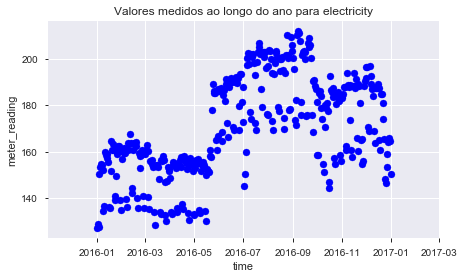

In [17]:
#Analisar as leituras do medidor electricity ao longo do tempo
fig3 = plt.scatter(weather_meter_0['timestamp'], (weather_meter_0['meter_reading']), color='b')

plt.xlabel('time')
plt.ylabel('meter_reading')
plt.title('Valores medidos ao longo do ano para electricity')
plt.gcf().set_size_inches(7, 4)
plt.savefig('fig3.png', format='png', dpi=300)



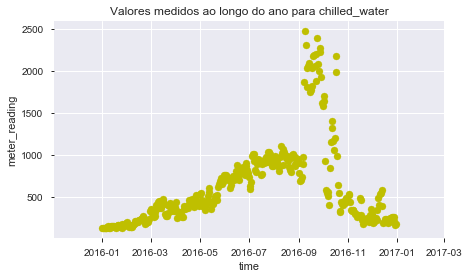

In [18]:
#Analisar as leituras do medidor chilled_water ao longo do tempo
fig4=plt.scatter(weather_meter_1['timestamp'], (weather_meter_1['meter_reading']), color='y')

plt.xlabel('time')
plt.ylabel('meter_reading')
plt.title('Valores medidos ao longo do ano para chilled_water')
plt.gcf().set_size_inches(7, 4)
plt.savefig('fig4.png', format='png', dpi=300)

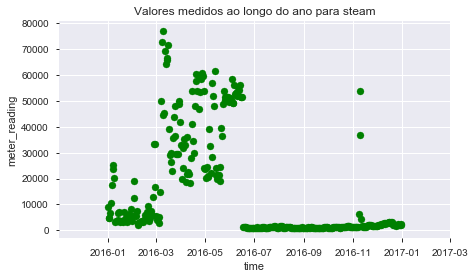

In [19]:
#Analisar as leituras do medidor steam ao longo do tempo
fig5=plt.scatter(weather_meter_2['timestamp'], (weather_meter_2['meter_reading']), color='g')

plt.xlabel('time')
plt.ylabel('meter_reading')
plt.title('Valores medidos ao longo do ano para steam')
plt.gcf().set_size_inches(7, 4)
plt.savefig('fig5.png', format='png', dpi=300)

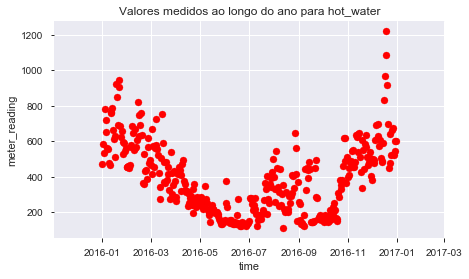

In [20]:
#Analisar as leituras do medidor hot_water ao longo do tempo
fig6=plt.scatter(weather_meter_3['timestamp'], (weather_meter_3['meter_reading']), color='r')

plt.xlabel('time')
plt.ylabel('meter_reading')
plt.title('Valores medidos ao longo do ano para hot_water')
plt.gcf().set_size_inches(7, 4)
plt.savefig('fig6.png', format='png', dpi=300)